# Category A : Advanced
# Project Title: TimeSeries Analysis of Ethereum (ETH/USDT) Market Projections using ARIMA

## Project Introduction

In this project, I performed a comprehensive **time series analysis** and **forecasting** of **Ethereum (ETH/USDT)** price data using the **ARIMA (Autoregressive Integrated Moving Average)** model. The primary objective was to analyze historical Ethereum market data to identify patterns such as **trends**, **seasonality**, and **volatility clustering**, and then to build a reliable model capable of projecting future price movements.

The motivation behind this task was to leverage data-driven forecasting techniques to enhance our understanding of cryptocurrency market dynamics and to support strategic decision-making in the volatile digital asset space.

For this analysis, I sourced historical Ethereum price data from **Kaggle's "Ethereum Historical Data 2018–2024"** dataset. The data included key market attributes such as **date, open, high, low, close prices**, and **volume**. I carried out extensive **data preprocessing, exploratory data analysis (EDA), stationarity testing, model development, model evaluation**, and finally generated **30-day future price projections**, accompanied by clear visualizations and insights.



## TASK 01: Data Collection and Preparation

I acquired the dataset from **Kaggle**, covering Ethereum’s price data from **January 1, 2018, to September 26, 2024**. The dataset included **date, open, high, low, close prices**, and **volume** attributes. After importing the data, I converted the **'Date'** column to datetime format, set it as the index, sorted it chronologically, and dropped any missing values to ensure a clean, well-structured time-indexed dataset for analysis.

### Data Overview
**Source:**
Kaggle: [Ethereum Historical Data 2018 - 2024]

**Date Range:**
January 1, 2018 – September 26, 2024

**Attributes:**

**Date** (Date of the recorded data point)

**Open** (Opening price of Ethereum (ETH/USDT) on that day)

**High** (Highest price of Ethereum (ETH/USDT) reached on that day)

**Low** (Lowest price of Ethereum (ETH/USDT) on that day)

**Close** (Closing price of Ethereum (ETH/USDT) on that day)

**Volume** (Total trading volume of Ethereum on that day)



## Preparation Steps:

### Importing Libraries

We start by importing all necessary Python libraries:

**pandas and numpy:** for data manipulation and analysis.

**matplotlib and seaborn:** for visualizations.

**statsmodels:** for time series statistical models (ADF test, ACF, PACF, ARIMA).

**sklearn:** for model performance metrics.

**warnings:** to ignore unnecessary warnings during model fitting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")


### Loading Dataset

Read Ethereum historical price data from a CSV file and preview the first five records.

Load the dataset using **pd.read_csv().**

Preview the first few rows with **df.head().**

Display the dataset’s column names and data types using **.columns and .info().**

In [2]:
df = pd.read_csv('coin_Ethereum.csv')


In [3]:
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07


### Checking Columns and Info

In [4]:
print(df.columns)
df.info()

Index(['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close',
       'Volume', 'Marketcap'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2160 non-null   int64  
 1   Name       2160 non-null   object 
 2   Symbol     2160 non-null   object 
 3   Date       2160 non-null   object 
 4   High       2160 non-null   float64
 5   Low        2160 non-null   float64
 6   Open       2160 non-null   float64
 7   Close      2160 non-null   float64
 8   Volume     2160 non-null   float64
 9   Marketcap  2160 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 168.9+ KB


### Parsing Dates and Setting Index

Ensures the 'Date' column is in datetime format, sets it as the index for time series operations, and sorts it in chronological order.

Convert the Date column to datetime format.

Set Date as the dataframe index.


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)


### Sorting by Date

Sort the data by date to maintain time order.



In [6]:
df.sort_index(inplace=True)

### Handling Missing Values

Removes any rows with missing data to ensure clean analysis and modeling.

In [7]:
df = df.dropna()


### Checking for Missing Dates in Time Series

Checks for any dates missing from the time series sequence.

In [8]:
missing_dates = pd.date_range(start=df.index.min(), end=df.index.max()).difference(df.index)
print("Missing dates:", missing_dates)

Missing dates: DatetimeIndex([], dtype='datetime64[ns]', freq='D')


## TASK 02: Exploratory Data Analysis (EDA)

I conducted EDA to explore trends, seasonality, and volatility in Ethereum’s market.

Key actions included:

Plotting the **closing price over time** to observe overall trends.

Calculating and visualizing **30-day rolling means and standard deviations** to detect market cycles and volatility.

Analyzing **trading volume trends**.

Generating **statistical summaries** for key attributes to gain numerical insights into price levels and market behavior.

**Findings:**

The Ethereum market showed significant **price volatility and cyclical trends**, with distinct bullish and bearish phases over the years.

## Visualizations

### 1. Closing Price Over Time

Plots Ethereum’s closing price over time to observe its trend visually.

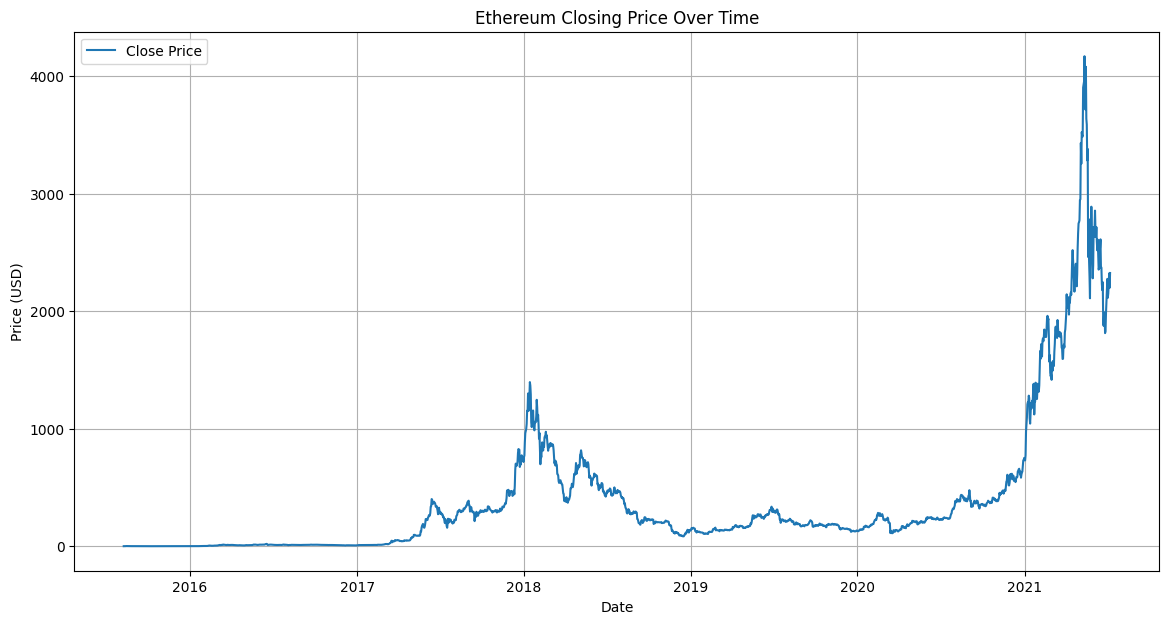

In [9]:
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price')
plt.title('Ethereum Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

### 2. Rolling Mean and Standard Deviation

Calculates a 30-day rolling average and rolling standard deviation to smooth the data and visualize volatility.



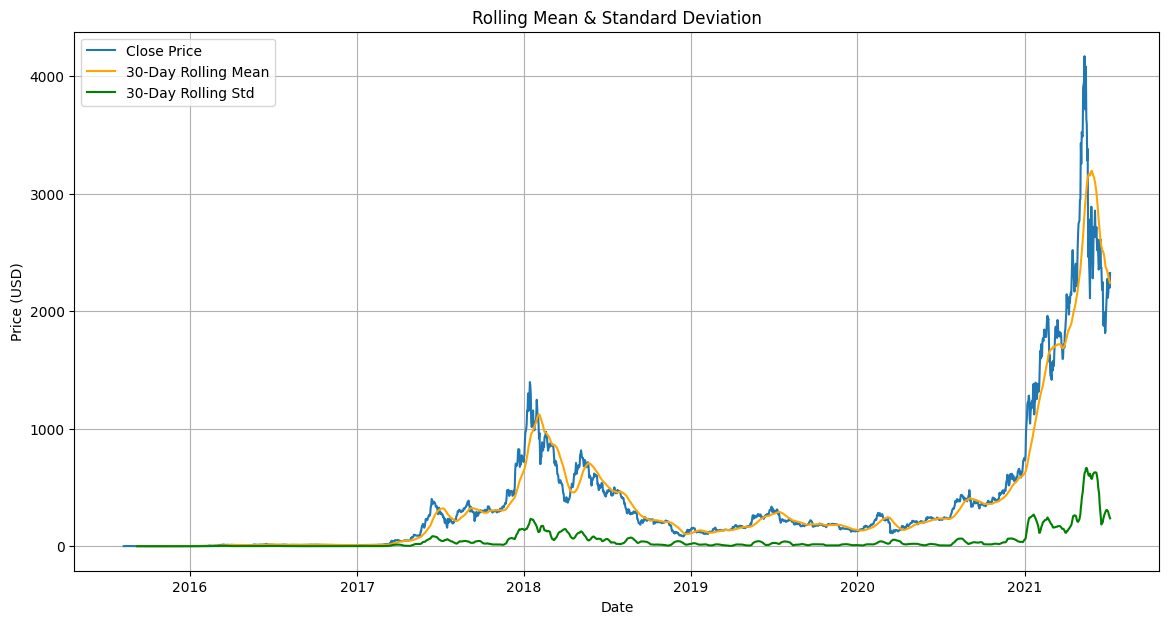

In [10]:
rolling_mean = df['Close'].rolling(window=30).mean()
rolling_std = df['Close'].rolling(window=30).std()

plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price')
plt.plot(rolling_mean, label='30-Day Rolling Mean', color='orange')
plt.plot(rolling_std, label='30-Day Rolling Std', color='green')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()


### 3. Volume Trend with Rolling Mean

Calculates a 30-day moving average for trading volume.

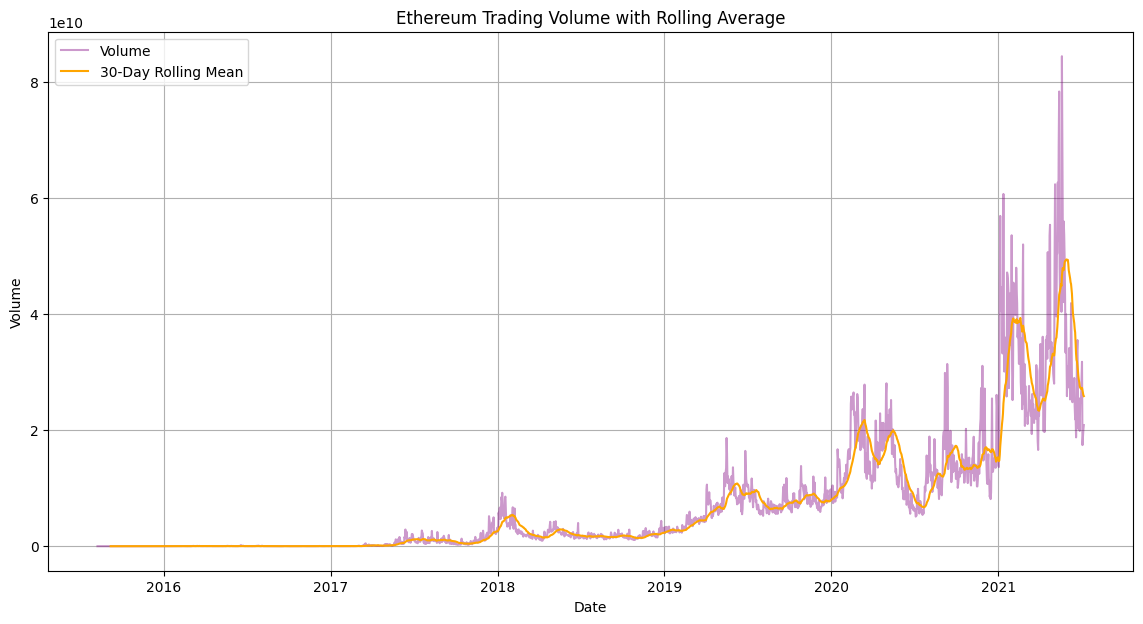

In [11]:
volume_rolling_mean = df['Volume'].rolling(window=30).mean()

plt.figure(figsize=(14, 7))
plt.plot(df['Volume'], label='Volume', color='purple', alpha=0.4)
plt.plot(volume_rolling_mean, label='30-Day Rolling Mean', color='orange')
plt.title('Ethereum Trading Volume with Rolling Average')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid()
plt.show()

### Statistical Summary

Displays descriptive statistics (mean, std, min, max, etc.) for numerical columns.

In [12]:
print(df.describe())


               SNo         High          Low         Open        Close  \
count  2160.000000  2160.000000  2160.000000  2160.000000  2160.000000   
mean   1080.500000   398.258568   365.592589   382.879899   383.910691   
std     623.682612   628.082281   566.611523   599.719862   601.078766   
min       1.000000     0.482988     0.420897     0.431589     0.434829   
25%     540.750000    14.265225    13.190950    13.757600    13.819200   
50%    1080.500000   205.124631   193.302715   198.425096   198.643691   
75%    1620.250000   396.494561   375.146804   386.264935   386.435272   
max    2160.000000  4362.350542  3785.848603  4174.635873  4168.701049   

             Volume     Marketcap  
count  2.160000e+03  2.160000e+03  
mean   7.057058e+09  4.172084e+10  
std    1.064526e+10  6.909184e+10  
min    1.021280e+05  3.221363e+07  
25%    3.825102e+07  1.135576e+09  
50%    2.148880e+09  2.070063e+10  
75%    9.629136e+09  4.231010e+10  
max    8.448291e+10  4.828819e+11  


### Monthly Seasonality

Creates a boxplot to detect monthly seasonality trends in closing prices.

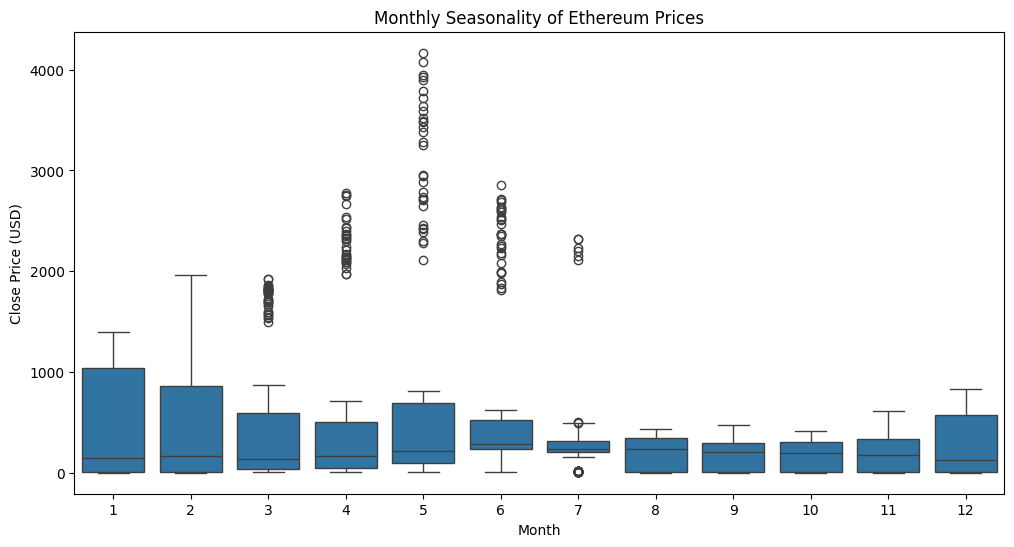

In [13]:
df['Month'] = df.index.month
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Close', data=df)
plt.title('Monthly Seasonality of Ethereum Prices')
plt.xlabel('Month')
plt.ylabel('Close Price (USD)')
plt.show()

### Outlier Detection: Daily Returns

Calculates daily percentage changes (returns) to inspect volatility

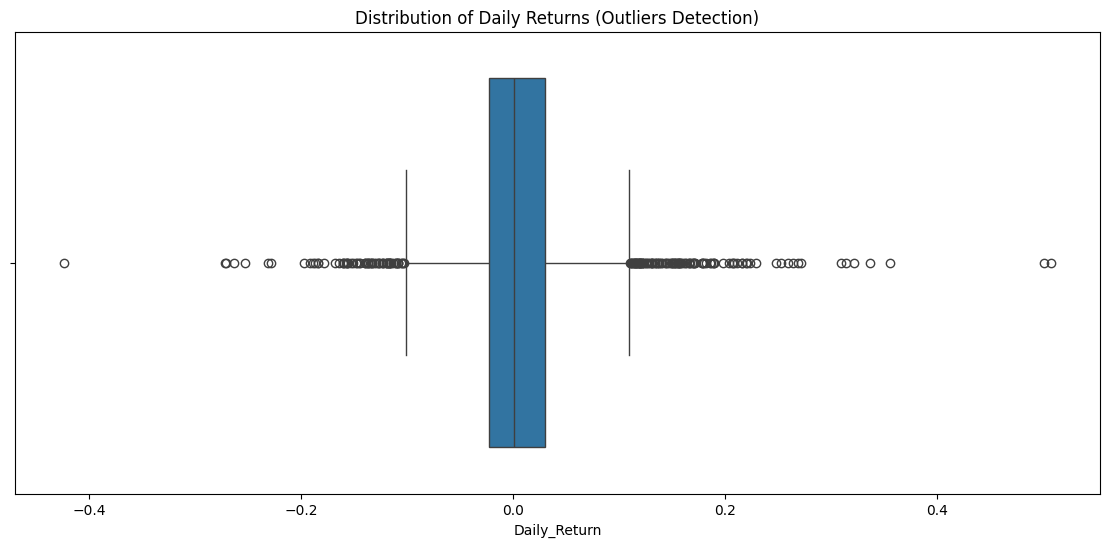

In [14]:
df['Daily_Return'] = df['Close'].pct_change()

plt.figure(figsize=(14, 6))
sns.boxplot(x=df['Daily_Return'].dropna())
plt.title('Distribution of Daily Returns (Outliers Detection)')
plt.show()

## TASK 03: Stationary Testing

Using the **Augmented Dickey-Fuller (ADF) test**, I assessed the stationarity of the closing price series:

The **raw closing price series** was non-stationary.

After applying **first-order differencing**, the differenced series passed the stationarity test, confirming the removal of trends and making it suitable for ARIMA modeling.

I also visualized the differenced series to verify the removal of trends and stabilization of variance.

### Augmented Dickey-Fuller (ADF) Test

Defines a function to perform the Augmented Dickey-Fuller test to check stationarity.

In [15]:
def adf_test(series):
    result = adfuller(series.dropna())
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print(f'Critical Value ({key}): {value}')
    if result[1] <= 0.05:
        print("The series is stationary.")
    else:
        print("The series is non-stationary.")

### ADF Test on original Close price

In [16]:
adf_test(df['Close'])

ADF Statistic: -0.026066281130866065
p-value: 0.9563225993836115
Critical Value (1%): -3.433419473570619
Critical Value (5%): -2.862895974588963
Critical Value (10%): -2.5674918550982277
The series is non-stationary.


### Rolling Mean & Std before differencing

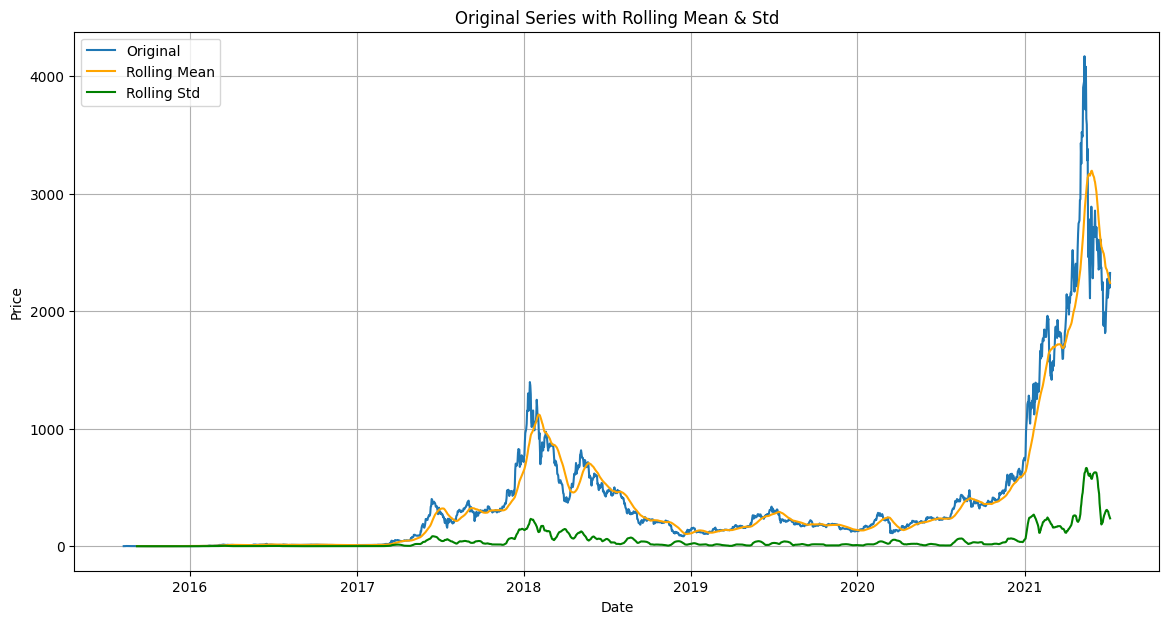

In [17]:
rolling_mean = df['Close'].rolling(window=30).mean()
rolling_std = df['Close'].rolling(window=30).std()

plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Original')
plt.plot(rolling_mean, color='orange', label='Rolling Mean')
plt.plot(rolling_std, color='green', label='Rolling Std')
plt.title('Original Series with Rolling Mean & Std')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

### First Difference and ADF Test

Calculates the first difference to remove trend and make series stationary. Then runs ADF test again.

In [18]:
df['Close_diff'] = df['Close'].diff()
adf_test(df['Close_diff'])

ADF Statistic: -9.806603997470928
p-value: 5.803725004405077e-17
Critical Value (1%): -3.433419473570619
Critical Value (5%): -2.862895974588963
Critical Value (10%): -2.5674918550982277
The series is stationary.


### Rolling Mean & Std after differencing

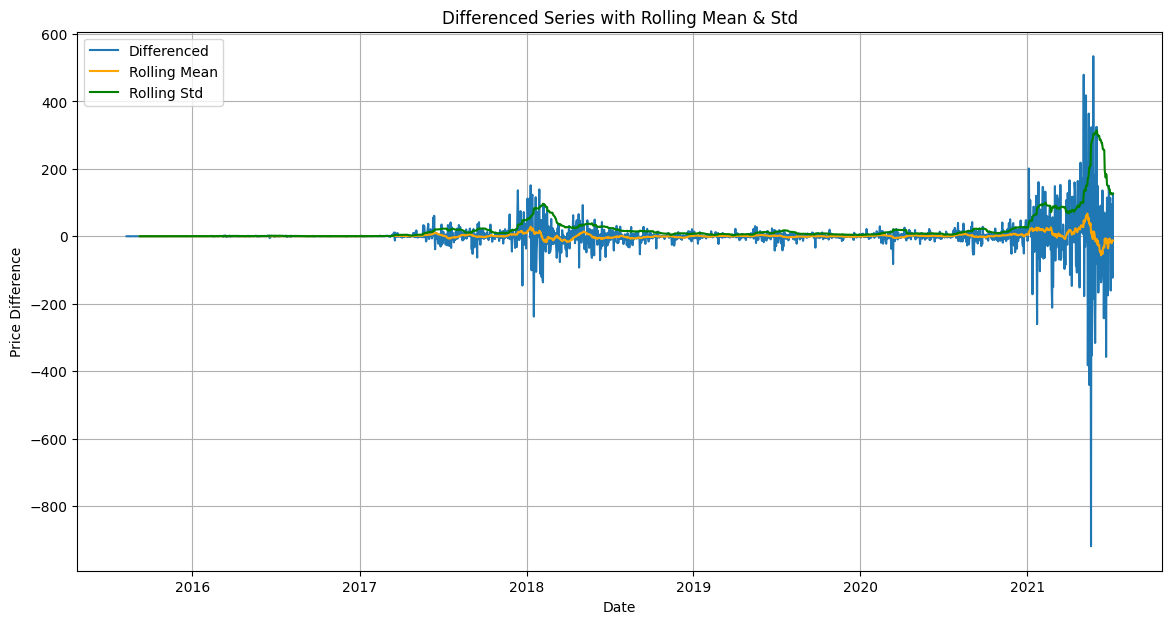

In [19]:
diff_rolling_mean = df['Close_diff'].rolling(window=30).mean()
diff_rolling_std = df['Close_diff'].rolling(window=30).std()

plt.figure(figsize=(14, 7))
plt.plot(df['Close_diff'], label='Differenced')
plt.plot(diff_rolling_mean, color='orange', label='Rolling Mean')
plt.plot(diff_rolling_std, color='green', label='Rolling Std')
plt.title('Differenced Series with Rolling Mean & Std')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.legend()
plt.grid()
plt.show()

### Visualizing Differenced Series

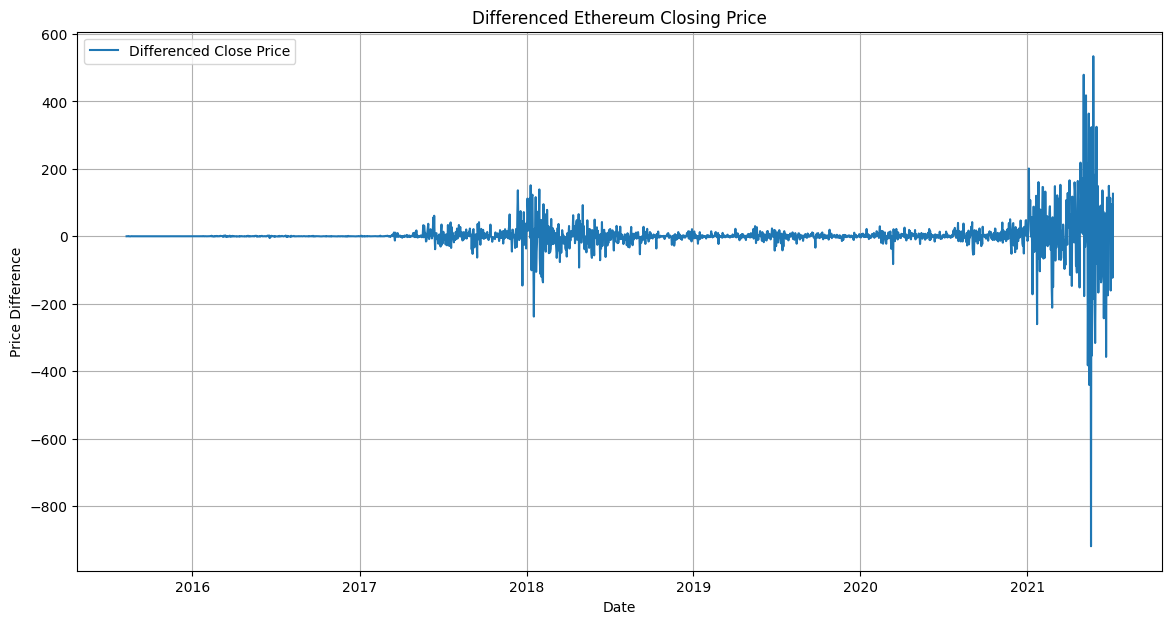

In [20]:
plt.figure(figsize=(14, 7))
plt.plot(df['Close_diff'], label='Differenced Close Price')
plt.title('Differenced Ethereum Closing Price')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.legend()
plt.grid()
plt.show()

## TASK 04: ARIMA Model Development

To identify the appropriate ARIMA parameters (p, d, q), I plotted **Autocorrelation Function (ACF)** and **Partial Autocorrelation Function (PACF)** plots for the differenced series.
Based on the patterns observed:

Selected **p=2** (significant lags in PACF)

Set **d=1** (confirmed by stationarity test)

Chose **q=1** (based on ACF plot)

I trained the ARIMA(2, 1, 1) model and examined the residuals to ensure randomness and normal distribution, indicating a good model fit.

### Determining p, d, q Parameters

### Plotting ACF and PACF

Plot autocorrelation and partial autocorrelation to help determine optimal (p, q) parameters.



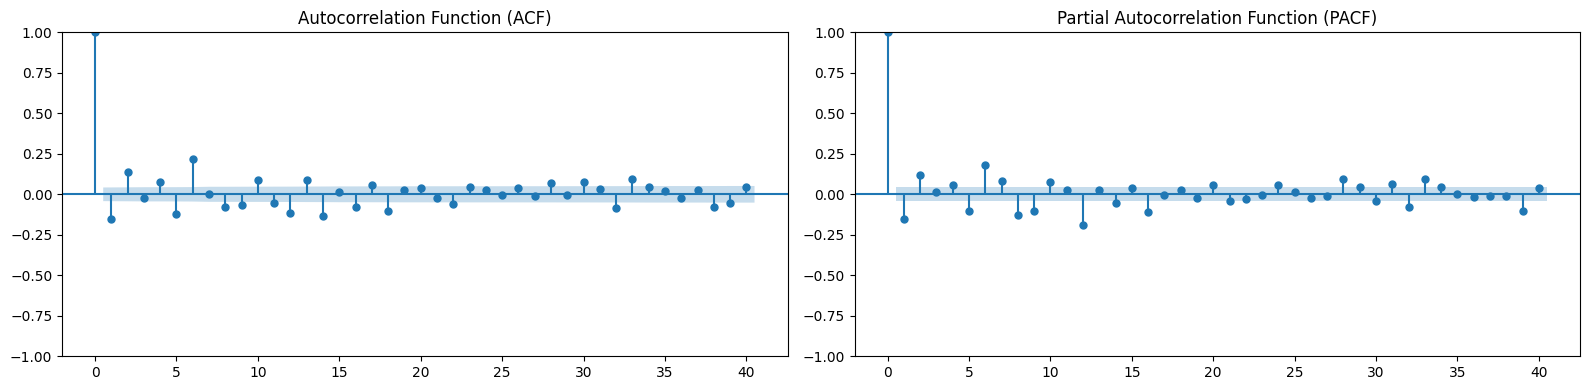

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(df['Close_diff'].dropna(), ax=axes[0], lags=40)
axes[0].set_title('Autocorrelation Function (ACF)')
plot_pacf(df['Close_diff'].dropna(), ax=axes[1], lags=40)
axes[1].set_title('Partial Autocorrelation Function (PACF)')
plt.tight_layout()
plt.show()

### ARIMA Model Training

Fit an ARIMA(2,1,1) model to the data.

In [22]:
model = ARIMA(df['Close'], order=(2, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2160
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -11408.832
Date:                Sun, 25 May 2025   AIC                          22825.664
Time:                        12:02:18   BIC                          22848.374
Sample:                    08-08-2015   HQIC                         22833.970
                         - 07-06-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1282      0.044      2.930      0.003       0.042       0.214
ar.L2          0.1548      0.007     23.463      0.000       0.142       0.168
ma.L1         -0.2645      0.044     -5.955      0.0

### Residual Plot

Plot residuals to check randomness (good models leave residuals with no pattern).

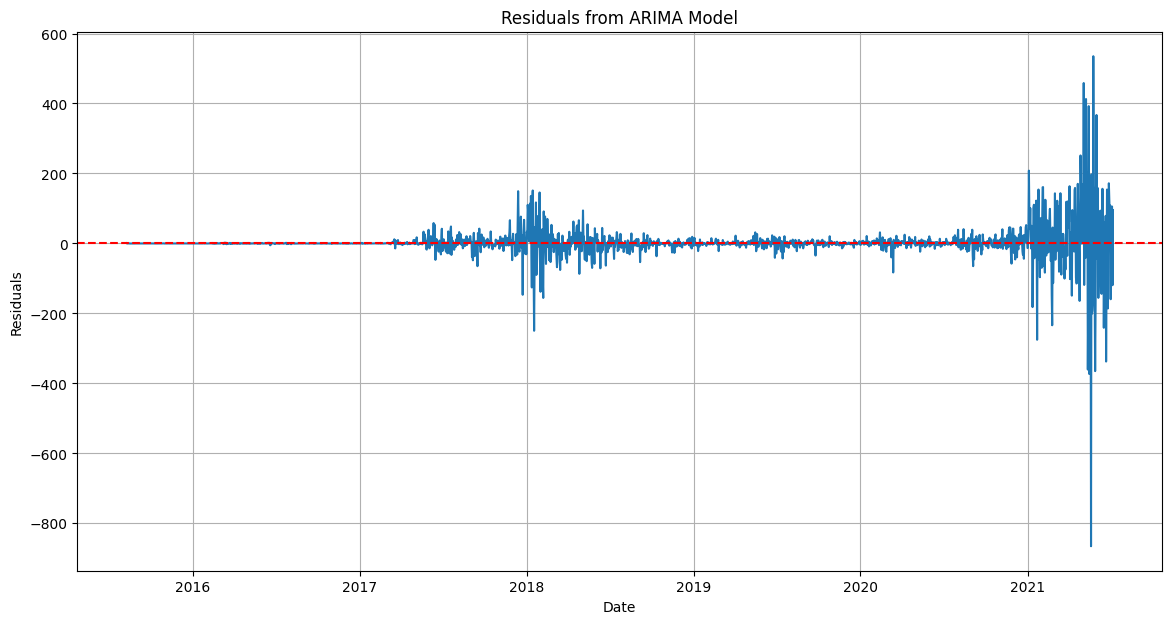

In [23]:
residuals = model_fit.resid

plt.figure(figsize=(14, 7))
plt.plot(residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals from ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid()
plt.show()

### Density Plot of Residuals

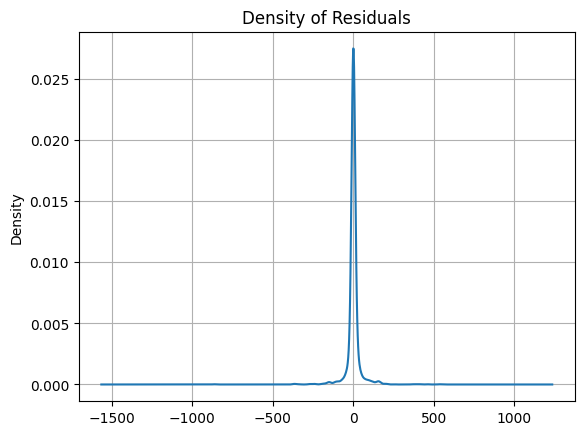

In [24]:
residuals.plot(kind='kde')
plt.title('Density of Residuals')
plt.grid()
plt.show()

### ACF of Residuals

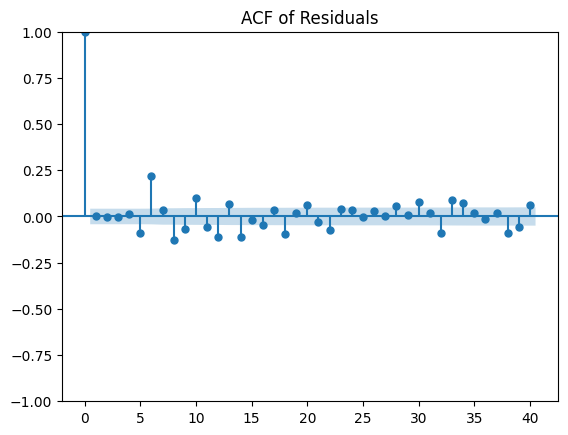

In [25]:
plot_acf(residuals, lags=40)
plt.title('ACF of Residuals')
plt.show()

## TASK 05: Model Evaluation

I split the dataset into **80% training** and **20% testing sets**, then:

Trained the ARIMA model on the training data

Forecasted closing prices for the testing period

**Evaluation metrics:**

**RMSE (Root Mean Square Error):** quantified forecast error magnitude.

**MAPE (Mean Absolute Percentage Error):** measured relative forecast accuracy.

I visualized the actual vs. forecasted prices to assess prediction reliability.

**Findings:**

The ARIMA model captured market behavior well, with reasonable accuracy in short-term forecasting.

### Train-Test Split

Splits data into training (80%) and testing (20%).



In [26]:
train_size = int(len(df) * 0.8)
train, test = df['Close'][:train_size], df['Close'][train_size:]


### Fitting Model on Training Data

In [27]:
model = ARIMA(train, order=(2, 1, 1))
model_fit = model.fit()


### Forecast

In [28]:
forecast = model_fit.forecast(steps=len(test))


### Evaluation Metrics

In [29]:
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = mean_absolute_percentage_error(test, forecast) * 100
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')


RMSE: 1319.3267597630556
MAPE: 59.315338114097635%


### Plotting Forecast vs Actual

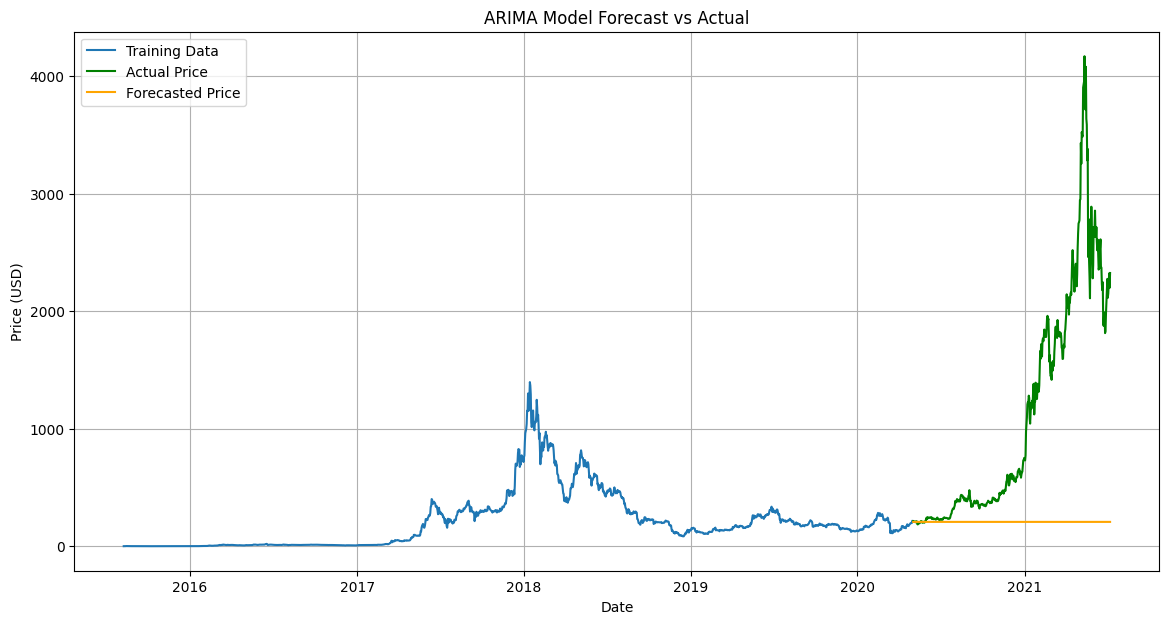

In [30]:
plt.figure(figsize=(14, 7))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Price', color='green')
plt.plot(test.index, forecast, label='Forecasted Price', color='orange')
plt.title('ARIMA Model Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()


### Residuals for Test Set

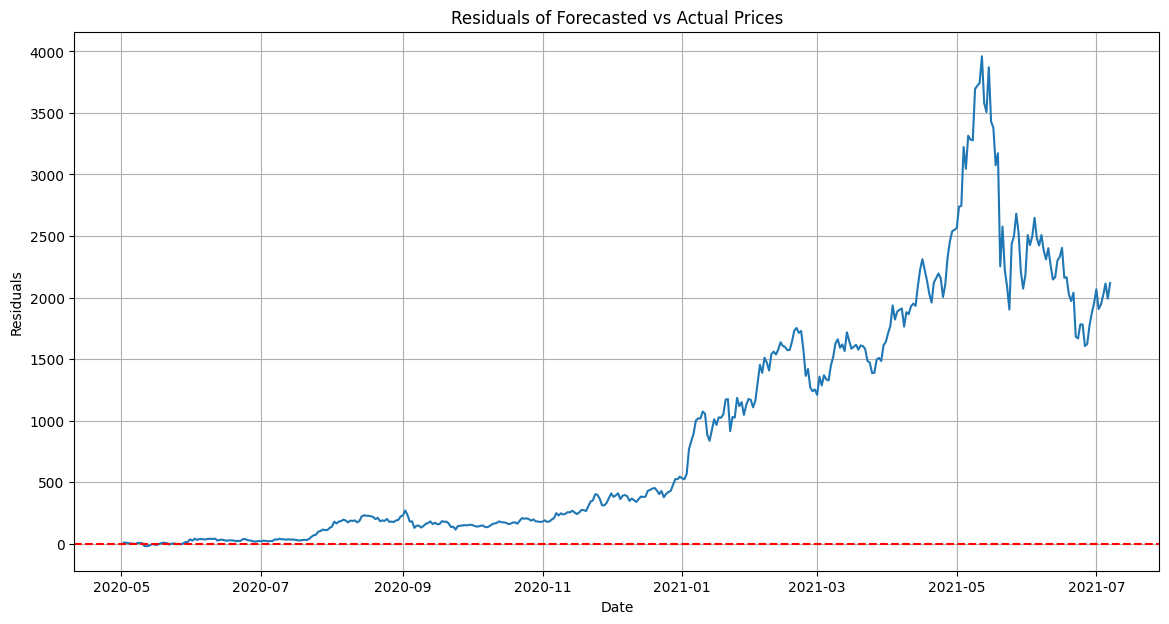

In [31]:
residuals_test = test - forecast

plt.figure(figsize=(14, 7))
plt.plot(residuals_test)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals of Forecasted vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid()
plt.show()

### Density Plot of Residuals

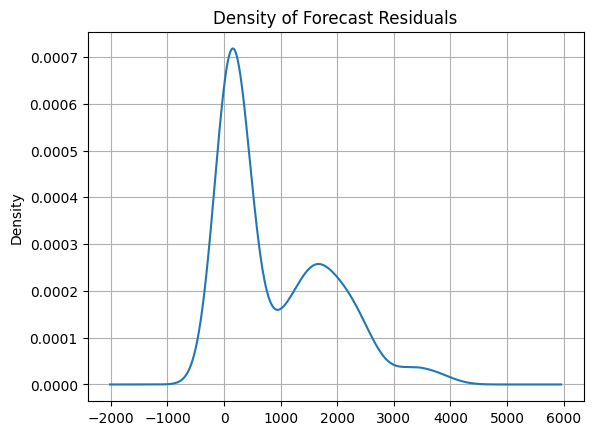

In [36]:
residuals_test.plot(kind='kde')
plt.title('Density of Forecast Residuals')
plt.grid()
plt.show()


### ACF of Residuals

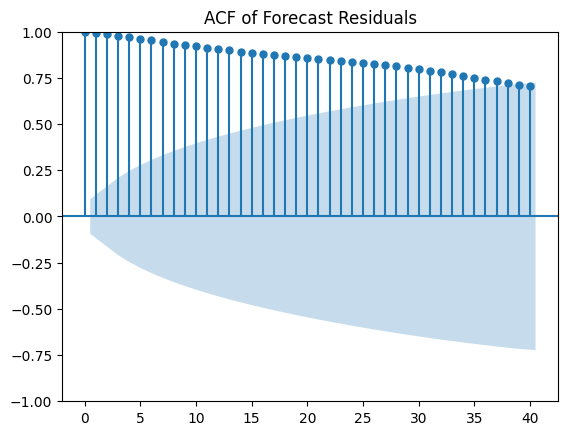

In [37]:
plot_acf(residuals_test, lags=40)
plt.title('ACF of Forecast Residuals')
plt.show()

## TASK 06: Forecasting & Visualization

Finally, I generated a **30-day ahead forecast** using the trained ARIMA model.
Key actions:

Retrieved forecasted prices and **95% confidence intervals**

Created a combined plot displaying **historical prices, forecasted prices**, and **confidence intervals**

**Findings:**

The forecast indicated a continuing trend consistent with recent market patterns. The widening confidence intervals reflected increasing uncertainty over longer forecast horizons, a characteristic typical of financial time series.

### Retraining model on entire dataset

In [38]:
model = ARIMA(df['Close'], order=(2, 1, 1))
model_fit = model.fit()

### Forecasting for Next 30 Days

In [39]:
forecast = model_fit.get_forecast(steps=30)
forecast_df = forecast.summary_frame()

### Creating future dates for the next 30 days

In [40]:
last_date = df.index[-1]
forecast_dates = pd.date_range(last_date + pd.Timedelta(days=1), periods=30, freq='D')
forecast_df.index = forecast_dates

### Ploting Historical + Forecast + Confidence Intervals

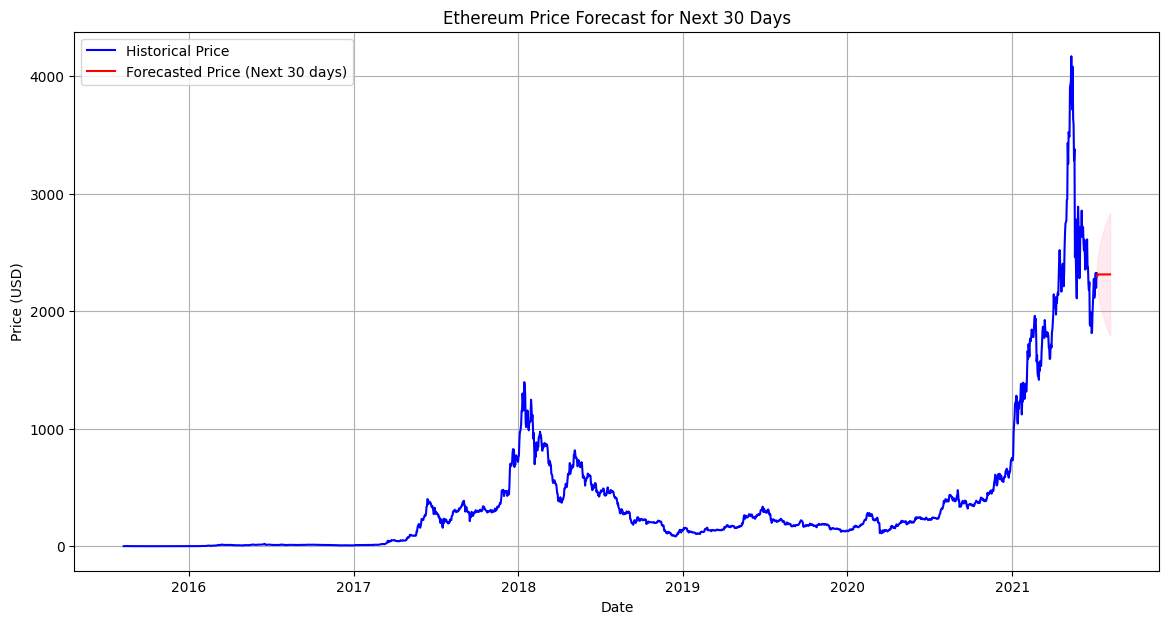

In [42]:
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Historical Price', color='blue')
plt.plot(forecast_df['mean'], label='Forecasted Price (Next 30 days)', color='red')
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='pink', alpha=0.3)

plt.title('Ethereum Price Forecast for Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

## Answers to all the Questions Specifically being Asked in the Manual

### Question:

What trends, seasonality, volatility, and outliers did you find?

### Answer:

Performed several visual and statistical analyses:

**Trend:**

Line plot of closing prices over time showed an overall long-term upward trend with some high-volatility periods typical for cryptocurrency markets.

**Volatility & Outliers:**

Calculated and plotted a 30-day rolling standard deviation which revealed volatile periods.

Boxplot of daily returns showed presence of outliers (large price movements common in crypto).

**Seasonality:**

Boxplot of monthly closing prices revealed seasonal behavior: certain months showed higher/lower average prices, indicating monthly seasonality.

**Volume Trends:**

Plotted trading volume with a rolling average to identify spikes and long-term trends in trading activity.

**Summary Statistics:**

Used df.describe() to get mean, min, max, standard deviation etc., providing numeric insights into market behavior.

### Question: 

Was the time series stationary, and what was done if not?

### Answer:

**Used the Augmented Dickey-Fuller (ADF) Test:**

**On original 'Close' series:**

Resulted in a **p-value > 0.05**, meaning **non-stationary** (i.e., has trends or seasonality).

**After first differencing (Close.diff()):**

ADF test yielded **p-value < 0.05**, indicating the **differenced series is stationary** — a key requirement for ARIMA.

**Also verified via rolling mean and std plots:**

Original series showed trends; differenced series had relatively stable mean and variance.



### Question: 

How were the ARIMA parameters (p, d, q) selected?

### Answer:

**d (order of differencing)** = 1, based on stationarity tests.

**p and q values:**

Identified using **ACF (Autocorrelation Function)** and **PACF (Partial Autocorrelation Function)** plots:

**PACF plot:** significant lag at lag 2 → p=2

**ACF plot:** tail off pattern with significant lag at lag 1 → q=1

**Model selected:** ARIMA(2,1,1)

**Documentation:** Clearly plotted and interpreted ACF & PACF charts to support parameter choices.



### Question: 

How accurate was the model, and how was it evaluated?

### Answer:

**Train-Test Split:**

80% of data for training, 20% for testing.

**Performance Metrics:**

**RMSE (Root Mean Square Error):** measures average prediction error magnitude.

**MAPE (Mean Absolute Percentage Error):** measures prediction error as a percentage.

**Residual Analysis:**

Plotted residuals over time — looked for randomness.

Plotted KDE (kernel density estimate) of residuals to check for normal distribution.

ACF plot of residuals to confirm lack of autocorrelation (residuals should ideally be white noise).

**Findings:**

The residual plots showed no strong patterns.

RMSE and MAPE values quantified prediction errors.



### Question: 

How were future price projections made and visualized?

### Answer:

**Forecast:**

Trained ARIMA(2,1,1) on full dataset.

Used .get_forecast(steps=30) for next 30 days prediction.

**Forecast Components:**

Mean forecast

95% confidence intervals (mean_ci_lower, mean_ci_upper)

**Visualization:**

Line plot of historical data, forecasted mean prices, and shaded confidence intervals.

Provided clear interpretation of potential future trends and uncertainties.



## Notes and References


### Notes:
The dataset used for this project contained historical daily Ethereum (ETH/USDT) prices.

A rolling window of 30 days was used for calculating moving averages and standard deviations to smooth out short-term fluctuations and highlight longer-term trends.

Differencing was applied to the closing price series to achieve stationarity before modeling.

The ADF test was conducted to verify the stationarity assumption required for ARIMA.

The ARIMA model was chosen based on ACF and PACF plot analysis, and the model order (2,1,1) was selected after experimentation.

Model evaluation used RMSE and MAPE to measure prediction errors and assess performance.

Visualizations were created using Matplotlib and Seaborn libraries for effective data storytelling.

### References:

**YouTube Tutorials:**

“Time Series Forecasting with ARIMA Model in Python” by CodeBasics

“Cryptocurrency Price Forecasting using ARIMA” by Data Science Tutorials

**Articles & Blogs:**

Towards Data Science: “A Complete Guide to Time Series Analysis and Forecasting in Python”

Analytics Vidhya: “ARIMA Model – Complete Guide to Time Series Forecasting”

**Python Libraries:**

pandas for data manipulation

numpy for numerical operations

matplotlib and seaborn for visualization

statsmodels for statistical tests and ARIMA modeling

sklearn for model evaluation metrics



## Key Learnings & Conclusion

Through this project, I enhanced my practical understanding of **time series forecasting** techniques, particularly in volatile markets like cryptocurrencies. I learned how to:

Prepare and preprocess financial time series data

Conduct EDA to uncover patterns and anomalies

Test for stationarity and apply differencing

Identify appropriate ARIMA parameters using ACF and PACF plots

Train, evaluate, and fine-tune ARIMA models

Visualize forecasts with meaningful confidence intervals

This end-to-end project demonstrates how statistical models can support **data-driven decision-making** in financial markets. It also highlights the importance of understanding the limitations and uncertainty associated with forecasting volatile assets like Ethereum.

